In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\king\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
os.chdir(r"D:\self study\project\loan_prediction1")

In [3]:
data = pd.read_csv("loan_prediction.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data = data.drop(['Loan_ID'], axis = 1)

In [6]:
data['Credit_History'] = data['Credit_History'].astype('category')

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#lets na values in dataset
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#lets perform EDA
#Quantitative data
features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202B7501908>,
      dtype=object)

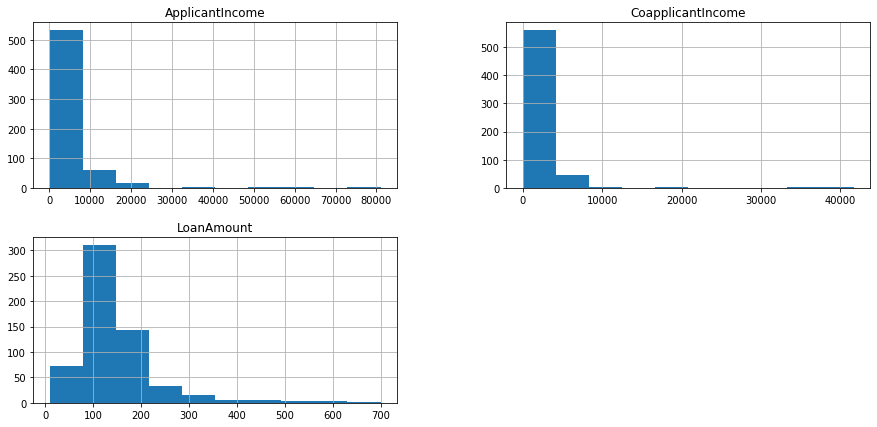

In [10]:
data[features].hist(figsize=(15, 7))

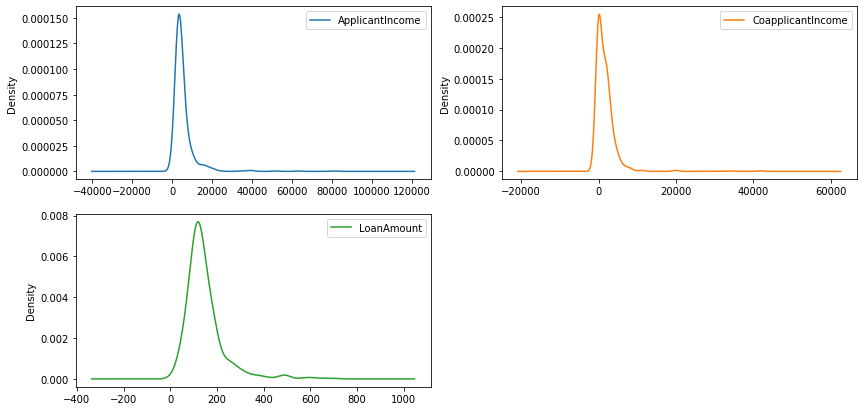

In [11]:
data[features].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(14, 7));

In [12]:
data[features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [13]:
#since we have have outliers 
#lets keep a maximum limit to quantitative variables
data['ApplicantIncome'].loc[(data['ApplicantIncome']> 30000)] = 30000
data['CoapplicantIncome'].loc[(data['CoapplicantIncome']> 20000)] = 20000
data['LoanAmount'].loc[(data['LoanAmount']> 600)] = 600

C:\Users\king\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


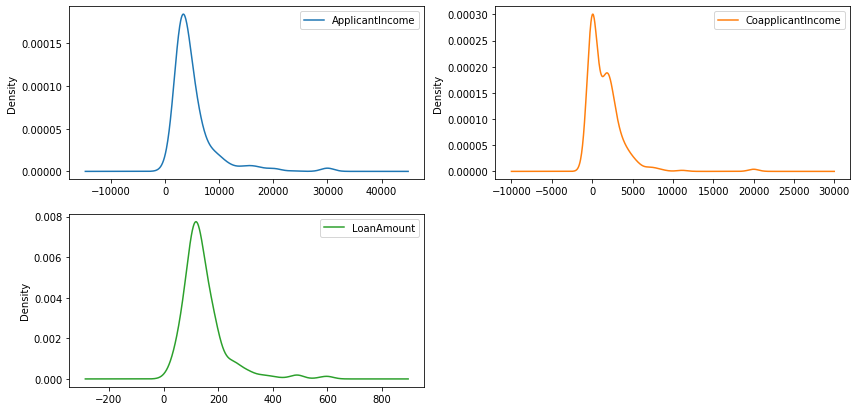

In [14]:
data[features].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(14, 7));

C:\Users\king\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\king\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


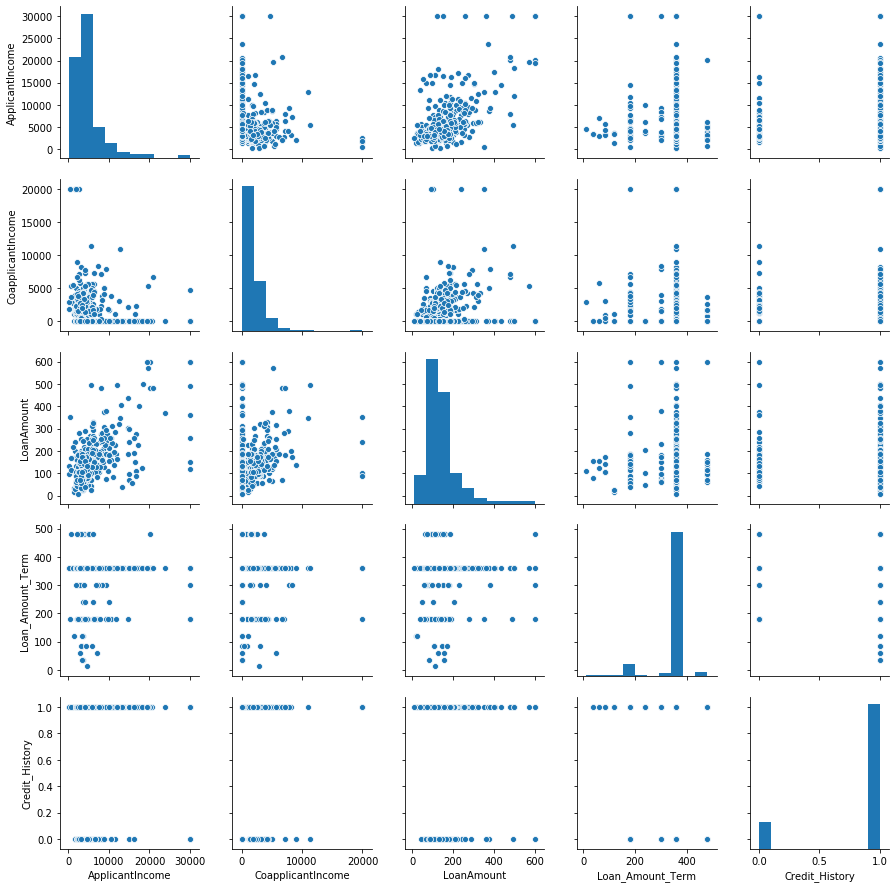

In [15]:
sns.pairplot(data)

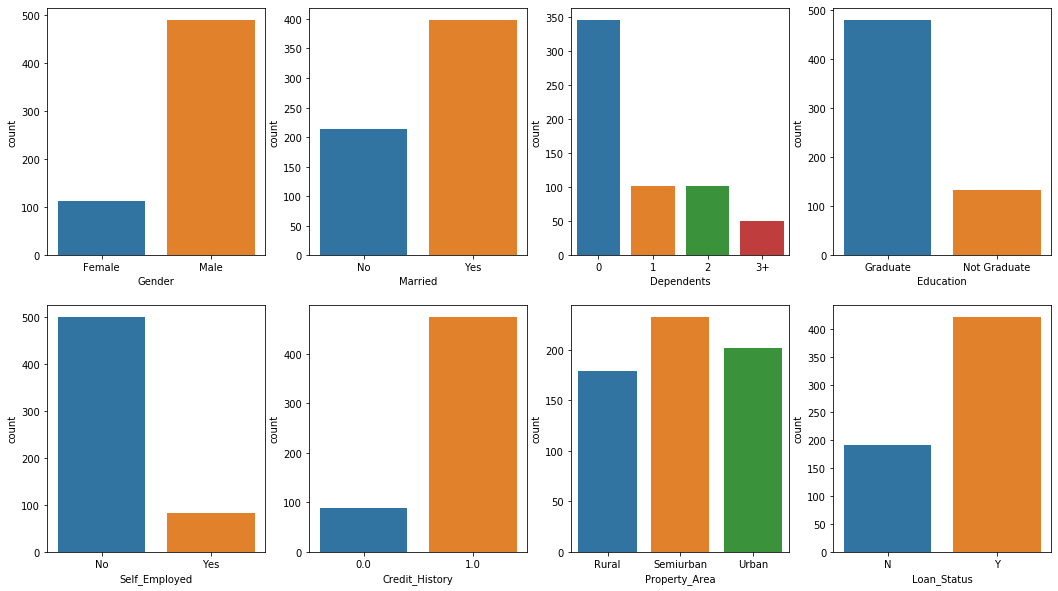

In [16]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
sns.countplot(data['Gender'], ax = axes[0,0])
sns.countplot(data['Married'], ax = axes[0,1])
sns.countplot(data['Dependents'], ax = axes[0,2])
sns.countplot(data['Education'], ax = axes[0,3])
sns.countplot(data['Self_Employed'], ax = axes[1,0])
sns.countplot(data['Credit_History'], ax = axes[1,1])
sns.countplot(data['Property_Area'], ax = axes[1,2])
sns.countplot(data['Loan_Status'], ax = axes[1,3])

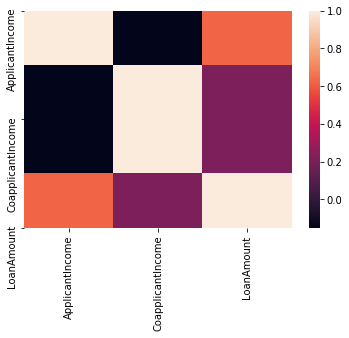

In [17]:
# Calculate corrrelation and plot
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix)

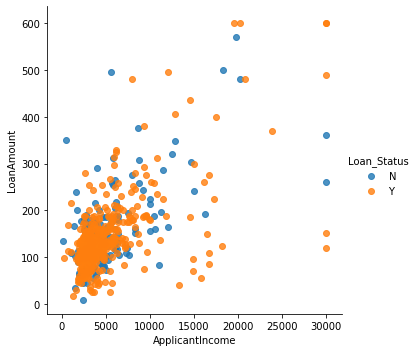

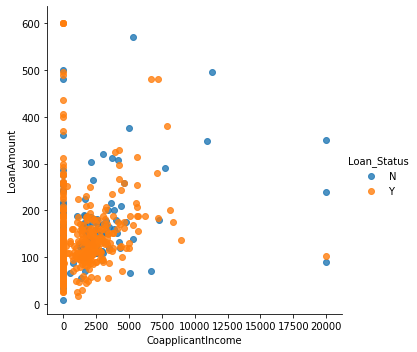

In [18]:
sns.lmplot('ApplicantIncome', 'LoanAmount', data = data, hue='Loan_Status', fit_reg=False)
sns.lmplot('CoapplicantIncome', 'LoanAmount', data=data, hue='Loan_Status', fit_reg=False)

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
data['Gender'] = data['Gender'].map({'Male':'0', 'Female':'1'})

In [21]:
data['Married'] = data['Married'].map({'No':'0', 'Yes':'1'})
data['Education'] = data['Education'].map({'Not Graduate':'0', 'Graduate':'1'})
data['Self_Employed'] = data['Self_Employed'].map({'No':'0', 'Yes':'1'})
data['Property_Area'] = data['Property_Area'].cat.codes

In [22]:
data['Dependents'] = data['Dependents'].map({'3+':'3','0':'0','1':'1','2':'2'})

In [23]:
data['Loan_Status'] = data['Loan_Status'].cat.codes

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [25]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# categorical columns
data.fillna(data.select_dtypes(include='category').mode().iloc[0], inplace=True)

In [ ]:
mean = round(data['LoanAmount'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(mean)

In [ ]:
mean = round(data['Loan_Amount_Term'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(mean)

In [38]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['ApplicantIncome'] = mms.fit_transform(np.array(data['ApplicantIncome']).reshape(-1,1))
data['CoapplicantIncome'] = mms.fit_transform(np.array(data['CoapplicantIncome']).reshape(-1,1))
data['LoanAmount'] = mms.fit_transform(np.array(data['LoanAmount']).reshape(-1,1))
data['Loan_Amount_Term'] = mms.fit_transform(np.array(data['Loan_Amount_Term']).reshape(-1,1))

In [43]:
#x-y 
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [44]:
#train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [46]:
# Defining the decision tree algorithmd
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [47]:
# Predicting the values of test data
y_pred = dtree.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       291

    accuracy                           1.00       411
   macro avg       1.00      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411



In [48]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred))

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.55      0.47      0.51        72
           1       0.73      0.79      0.76       131

    accuracy                           0.67       203
   macro avg       0.64      0.63      0.63       203
weighted avg       0.67      0.67      0.67       203



Text(0.5, 1, 'Accuracy Score: 0.6748768472906403')

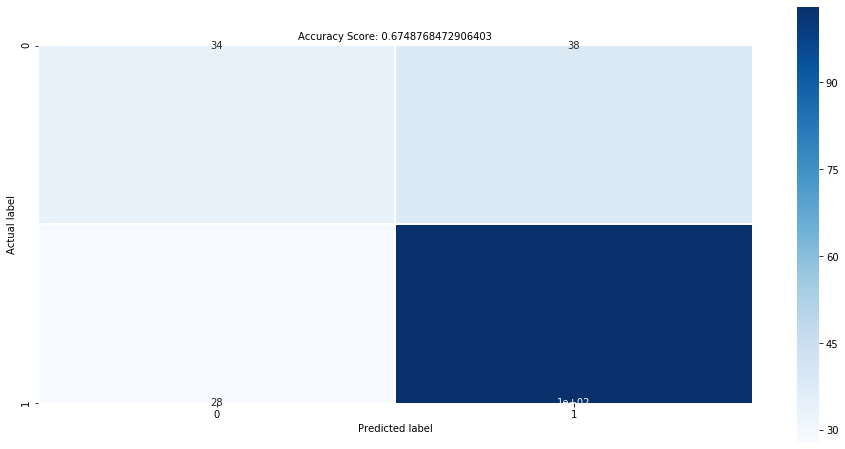

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16,8))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

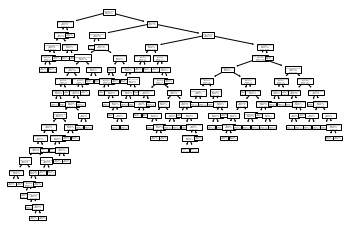

In [50]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = x.columns)